In [26]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#import the dataset
df = pd.read_csv('full_output_features.csv')

#name the columns
df.columns = ['outcome_class','project_name','hash','commit_message','files_changed','insertions','deletions']
df.head()

#select the target array
Y_labels = df.outcome_class

#use CountVectorizer()
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.commit_message)

#use TfidfTransformer()
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_commit_log = tf_transformer.transform(X_train_counts)

In [27]:
#show the dataset
df[0:50]

,outcome_class,project_name,hash,commit_message,files_changed,insertions,deletions
0,1,ant,7bc745a289cf68cb2eba647bbfba9e9ec06eb771,post-process generated javadocs as workaround ...,6,171,3
1,1,ant,08284bc7aa7d066544b30974231240c9b73597eb,[CVE-2012-2098] merge bzip2 edge case improvem...,4,1310,573
2,1,ambari-logsearch,1811d0bad0b5e3691036c027cef24e289640e704,AMBARI-24431. Infra Manager / Log Search: Fix ...,1,1,1
3,1,ambari-logsearch,37db2229747c0e58e95e14a787895af7308f90a2,AMBARI-24422. Log Feeder: upgrade guava versio...,3,3,3
4,1,mod_perl,82b8d8bfe88a8878e1efb793c69548e1eb9eed55,Fix t/perl/hash_attack.t to work with Perl 5.1...,2,29,9
5,1,maven,2b336ff150b12aeae9bd0d2a61f1e8d02504492f,[MNG-6312] Update Maven Wagon dependency o Up...,1,1,1
6,1,mirrormanager2,776cc7bf708268e542ebfd1c897d704a53126a82,Merge pull request #173 from fedora-infra/CVE-...,2,10,5
7,1,apex-core,805aba30b5b84e39cf6dda8c6d5a805a3c880c60,APEXCORE-815 Whitelist CVE-2016-6811,2,5,1
8,1,ofbiz,c6f6801737c06ea19b648fdda2d7b03d4a78a3be,Updates Shiro to 1.2.5 (CVE-2016-4437) - https...,5,3,3
9,1,ofbiz,dfce427e08676d9a18960b848bf9f20d908fb92e,Updates OWASP dependency check files. Several ...,2,6202,8128


In [28]:
#show the dictionary of feature indices:

count_vect.vocabulary_.get(u'algorithm')

7670

In [18]:
#print the vocabulary.

print(count_vect.vocabulary_)

{'post': 20738, 'process': 21021, 'generated': 14018, 'javadocs': 16068, 'as': 8205, 'workaround': 27542, 'for': 13685, 'cve': 11050, '2013': 2032, '1571': 1600, 'based': 8676, 'on': 19539, 'maven': 17747, 'patch': 20102, 'by': 9295, 'uwe': 26819, 'schindler': 23185, 'pr': 20790, '55132': 5317, '2012': 2029, '2098': 2162, 'merge': 17920, 'bzip2': 9324, 'edge': 12388, 'case': 9495, 'improvement': 15336, 'from': 13837, 'commons': 10221, 'compress': 10318, 'ambari': 7764, '24431': 2851, 'infra': 15477, 'manager': 17592, 'log': 17275, 'search': 23293, 'fix': 13512, 'jetty': 16179, '2018': 2061, '12536': 908, '2002': 2001, '24422': 2846, 'feeder': 13296, 'upgrade': 26629, 'guava': 14527, 'version': 26980, 'because': 8761, 'of': 19453, '10237': 262, '1992': 1973, 'perl': 20274, 'hash_attack': 14666, 'to': 25788, 'work': 27540, 'with': 27485, '14': 1252, '16': 1631, 'etc': 12827, 'which': 27402, 'contain': 10561, '1667': 1671, 'memory': 17895, 'exhaustion': 12978, 'arbitrary': 8094, 'hash': 1

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#split x and y into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_commit_log, Y_labels, random_state=0)

#train a linear SVM model on the training set 
clf_commit_log = LinearSVC().fit(Xtrain, ytrain)

#make class predictions for the testing set
y_commit_log_model = clf_commit_log.predict(Xtest)

#calculate accuracy
accuracy_score(ytest, y_commit_log_model)

0.9887280823824103

In [30]:
from sklearn import metrics

#show classification report
print(metrics.classification_report(ytest, y_commit_log_model))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5983
           1       0.97      0.96      0.97      1203

   micro avg       0.99      0.99      0.99      7186
   macro avg       0.98      0.98      0.98      7186
weighted avg       0.99      0.99      0.99      7186



In [31]:
#print confusion matrix
metrics.confusion_matrix(ytest, y_commit_log_model)

array([[5945,   38],
       [  43, 1160]])

In [22]:
#import the testing dataset
df_test = pd.read_csv('testing_dataset.csv')

#transform the data
Xtest_counts = count_vect.transform(df_test.commit_message)
Xtest_commit_log = tf_transformer.transform(Xtest_counts)

#predict the data
Y_predict = clf_commit_log.predict(Xtest_commit_log)

#create 'predicted class' column with predicted classes.
df_test["predicted class"]= Y_predict
df_test[150:500]

,project_name,hash,commit_message,predicted class
150,tomcat,5b224440ff26f50c54d2467e921ab89b979c106e,Add the IPv6 loopback address to the default i...,0
151,tomcat,9be5b5c0c6f2ae847223149731e27165d06ab1f6,This class is a singleton so need to obtain lo...,0
152,tomcat,99b9581d78d4e1db4a46fd60dbe2e06415ee1991,Add comment to non-static loggers,0
153,tomcat,9c20def8ff0c46bd63f0fe8ffe88da776dbae551,Fix broken test,0
154,tomcat,d80d41fb437f7ba12916189f0f24934812b5eafd,Switch to non-static loggers where there is a ...,0
155,tomcat,36138208679322751d694ade3f3240ec26ad5287,62423: Fix attribute typo.,0
156,tomcat,c6ab61c1a282ca8d260e6fd65f18d5cf2bb9bb8c,Better name for test servlet,0
157,tomcat,87e90eba83b42d015f6bb405e5b50bd7b16e83ad,Fix error message typo.,0
158,tomcat,d00e9889a03ac1b203b14d9788bfd50e809b7f21,Correct the documentation for the allowHostHea...,0
159,tomcat,95d19f558e1acaabdd8dffe322eedd93063907e1,Update docs after changes for CVE-2018-8014,1


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

#10-fold cross validation
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
clf = svm.SVC(kernel='linear', C=1)
scores = cross_validate(clf, X_commit_log, Y_labels, scoring=scoring,
                         cv=KFold(n_splits=10, random_state=512, shuffle=True))

for metric_name in ['test_precision_macro', 'test_recall_macro', 'test_f1_macro', 'test_accuracy']:
    print("%s: %0.2f (+/- %0.2f)" % (metric_name, scores[metric_name].mean(), scores[metric_name].std() * 2))

test_precision_macro: 0.98 (+/- 0.01)
test_recall_macro: 0.98 (+/- 0.01)
test_f1_macro: 0.98 (+/- 0.01)
test_accuracy: 0.99 (+/- 0.01)


In [40]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

#import the dataset
df = pd.read_csv('full_output_features.csv');

#select the columns from the dataset
col = ['files_changed','insertions','deletions']
X_patch = df[col]

#name the columns
X_patch.columns = ['files_changed','insertions','deletions']
df.head()

#select the target array
Y_labels = df.outcome_class

#fill the empty cells with 0's
X_patch = X_patch.fillna(0)

#remove unwanted charachters
#X_patch['files_changed'] = X_patch['files_changed'].str.extract('(\d+)')
#X_patch['insertions'] = X_patch['insertions'].str.extract('(\d+)')
#X_patch['deletions'] = X_patch['deletions'].str.extract('(\d+)')

#normalise the data
X_patch_normalized = preprocessing.normalize(X_patch, norm ='l2')

In [41]:
Y_labels.shape

(9839,)

In [42]:
X_patch.shape

(9839, 3)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#split x and y into training and testing sets
Xtrain_stat, Xtest_stat, ytrain_stat, ytest_stat = train_test_split(X_patch_normalized, Y_labels, random_state=0)

#train a linear SVM model on the training set 
clf_patch = LinearSVC().fit(Xtrain_stat, ytrain_stat)

#make class predictions for the testing set
y_patch_model = clf_patch.predict(Xtest_stat)

#calculate accuracy
accuracy_score(ytest_stat, y_patch_model)

0.5439024390243903

In [44]:
from sklearn import metrics

#show classification report
print(metrics.classification_report(ytest_stat, y_patch_model))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1237
           1       0.53      0.65      0.59      1223

   micro avg       0.54      0.54      0.54      2460
   macro avg       0.55      0.54      0.54      2460
weighted avg       0.55      0.54      0.54      2460



In [45]:
#print confusion matrix
metrics.confusion_matrix(ytest_stat, y_patch_model)

array([[544, 693],
       [429, 794]])

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

#10-fold cross validation
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
clf = svm.SVC(kernel='linear', C=1)
scores = cross_validate(clf, X_patch_normalized, Y_labels, scoring=scoring,
                         cv=KFold(n_splits=10, random_state=512, shuffle=True))

for metric_name in ['test_precision_macro', 'test_recall_macro', 'test_f1_macro', 'test_accuracy']:
    print("%s: %0.2f (+/- %0.2f)" % (metric_name, scores[metric_name].mean(), scores[metric_name].std() * 2))

test_precision_macro: 0.54 (+/- 0.02)
test_recall_macro: 0.54 (+/- 0.02)
test_f1_macro: 0.53 (+/- 0.02)
test_accuracy: 0.54 (+/- 0.02)


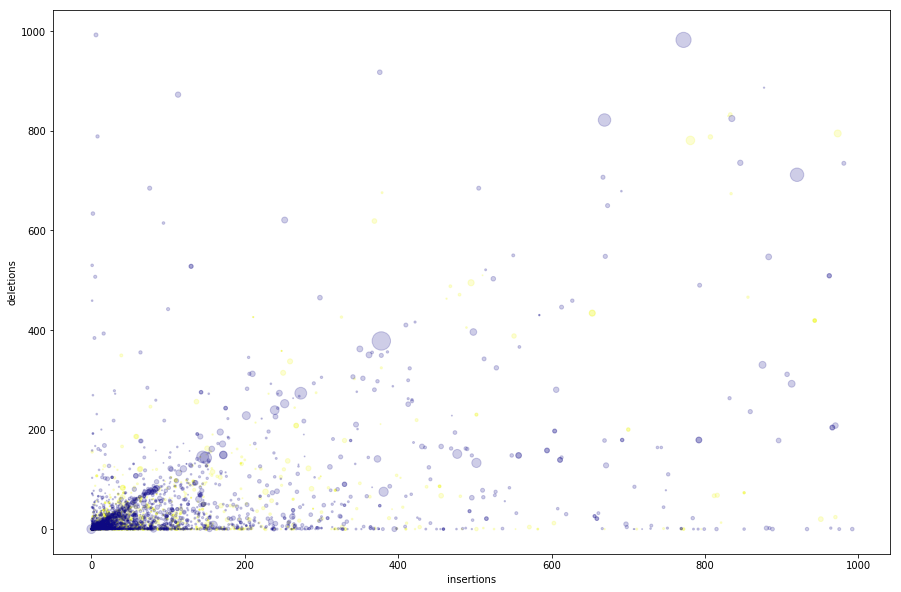

In [47]:
#graph representing data points of patch dataset
import matplotlib.pyplot as plt

col_stat = ['outcome_class','files_changed','insertions','deletions']
df_stat = df[col_stat]
df_stat.head()

df_stat = df_stat.drop(df_stat[df_stat.deletions > 1000].index)
df_stat = df_stat.drop(df_stat[df_stat.insertions > 1000].index)
df_stat = df_stat.drop(df_stat[df_stat.files_changed > 1000].index)

plt.scatter(df_stat.insertions, df_stat.deletions, s=df_stat.files_changed, c=df_stat.outcome_class, data=df_stat, alpha=0.2, cmap='plasma')

plt.xlabel('insertions')
plt.ylabel('deletions')

fig = plt.gcf()
fig.set_size_inches(15, 10)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


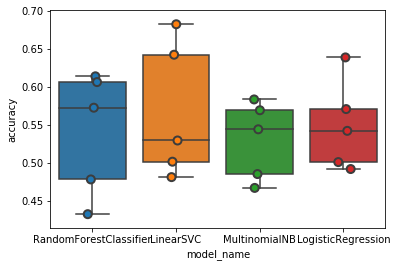

In [48]:
#compare the accuracy of different ML models.
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_patch, Y_labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

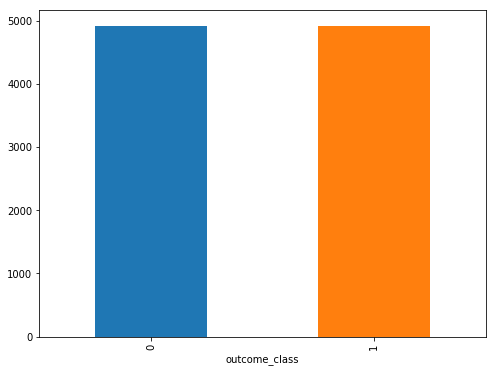

In [15]:
#Plot a graph that represents the quantity of 0/1 entries in the dataset. 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('outcome_class').commit_message.count().plot.bar(ylim=0)
plt.show()